# How to read and write observational datasets

In [1]:
import nes
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

## 1. Non-GHOST

### 1.1. Open dataset

In [2]:
# Original path: /esarchive/obs/nilu/ebas/daily/pm10/pm10_201507.nc
# Points grid from EBAS network (non-GHOST)
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/pm10_201507.nc'

In [3]:
nessy = nes.open_netcdf(path=path, info=True, parallel_method='X')
nessy

#### Read coordinates

In [4]:
nessy.time[0:10]

[datetime.datetime(2015, 7, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 1, 0),
 datetime.datetime(2015, 7, 1, 2, 0),
 datetime.datetime(2015, 7, 1, 3, 0),
 datetime.datetime(2015, 7, 1, 4, 0),
 datetime.datetime(2015, 7, 1, 5, 0),
 datetime.datetime(2015, 7, 1, 6, 0),
 datetime.datetime(2015, 7, 1, 7, 0),
 datetime.datetime(2015, 7, 1, 8, 0),
 datetime.datetime(2015, 7, 1, 9, 0)]

In [5]:
nessy.lev

{'data': array([0]), 'units': ''}

In [6]:
nessy.station

{'data': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])}

Variables are built with `station` and `time`as main dimensions, but the coordinates `lat` and `lon` remain accessible

In [7]:
nessy.lat

{'data': masked_array(data=[46.81305694580078, 47.479766845703125,
                    47.049468994140625, 47.06740951538086,
                    35.03916549682617, 56.35444259643555,
                    56.711666107177734, 55.69410705566406,
                    59.49444580078125, 58.3761100769043, 39.54694366455078,
                    42.72055435180664, 39.87527847290039,
                    37.237220764160156, 43.43916702270508,
                    41.274166107177734, 42.31916809082031,
                    38.4727783203125, 39.08277893066406,
                    41.238887786865234, 41.393890380859375,
                    42.63472366333008, 37.051944732666016,
                    51.57107925415039, 55.79216003417969,
                    46.96666717529297, 51.93333435058594, 64.0999984741211,
                    45.81444549560547, 58.43299865722656,
                    65.83333587646484, 62.78333282470703,
                    60.36666488647461, 51.81444549560547,
                    5

In [8]:
nessy.lon

{'data': masked_array(data=[6.944468975067139, 8.904696464538574,
                    6.979203224182129, 8.463338851928711,
                    33.05805969238281, 9.603058815002441,
                    11.533614158630371, 12.088668823242188,
                    25.93056869506836, 21.845012664794922,
                    -4.350555896759033, -8.92361068725586,
                    4.316389083862305, -3.5341670513153076,
                    -4.849999904632568, -3.1424999237060547,
                    3.31583309173584, -6.923611164093018,
                    -1.1011110544204712, -5.897500038146973,
                    0.7347220182418823, -7.704721927642822,
                    -6.5552778244018555, -1.3252860307693481,
                    -3.2428998947143555, 19.549999237060547,
                    -10.233333587646484, -21.016944885253906,
                    8.637225151062012, 8.269000053405762,
                    13.916666984558105, 8.883333206176758,
                    11.066666603088379

#### Read variables

If we want to load all variables, we don't use the function `keep_vars`

In [9]:
nessy.load()

Rank 000: Loading station_start_date var (1/17)
Rank 000: Loaded station_start_date var ((84,))
Rank 000: Loading station_zone var (2/17)
Rank 000: Loaded station_zone var ((84,))
Rank 000: Loading street_type var (3/17)
Rank 000: Loaded street_type var ((84,))
Rank 000: Loading country_code var (4/17)
Rank 000: Loaded country_code var ((84,))
Rank 000: Loading ccaa var (5/17)
Rank 000: Loaded ccaa var ((84,))
Rank 000: Loading station_name var (6/17)
Rank 000: Loaded station_name var ((84,))
Rank 000: Loading station_area var (7/17)
Rank 000: Loaded station_area var ((84,))
Rank 000: Loading city var (8/17)
Rank 000: Loaded city var ((84,))
Rank 000: Loading pm10 var (9/17)
Rank 000: Loaded pm10 var ((31, 84))
Rank 000: Loading station_emep var (10/17)
Rank 000: Loaded station_emep var ((84,))
Rank 000: Loading station_type var (11/17)
Rank 000: Loaded station_type var ((84,))
Rank 000: Loading country var (12/17)
Rank 000: Loaded country var ((84,))
Rank 000: Loading altitude var (13

As `variables` is a dictionary, we can access each variable using square brackets

In [10]:
nessy.variables['pm10']

{'data': array([[17.9 , 15.4 , 16.2 , ...,   nan, 14.83,   nan],
        [22.9 , 16.8 , 20.5 , ...,   nan, 24.8 ,   nan],
        [24.1 , 22.8 , 20.2 , ...,   nan, 13.92,   nan],
        ...,
        [ 6.3 ,  7.2 ,  4.5 , ...,   nan,  8.32,  9.3 ],
        [ 7.6 ,  8.9 ,  8.2 , ...,   nan, 13.02,  9.3 ],
        [11.  ,  9.8 ,  8.8 , ...,   nan, 14.14, 12.7 ]], dtype=float32),
 'dimensions': ('time', 'station'),
 'dtype': dtype('float32'),
 'units': 'µg/m3',
 'long_name': 'pm10_mass pm10'}

### 1.2. Plot

Here it makes no sense to use `pcolormesh` to plot the data, we need to generate a shapefile instead

In [11]:
nessy.create_shapefile()

geometry
FID                           
0     POINT (6.94447 46.81306)
1      POINT (8.9047 47.47977)
2      POINT (6.9792 47.04947)
3     POINT (8.46334 47.06741)
4    POINT (33.05806 35.03917)
..                         ...
79            POINT (4.5 52.3)
80   POINT (12.97222 46.67778)
81   POINT (-6.36452 52.17807)
82    POINT (6.27722 53.33389)
83     POINT (16.2322 38.8763)

[84 rows x 1 columns]

At this point, the shapefile only contains the geometries and we need to add data to it. In this case we are adding PM10 from all stations for the first timestep `[0, :]`

In [12]:
nessy.shapefile['pm10'] = nessy.variables['pm10']['data'][0, :].ravel()
nessy.shapefile

geometry       pm10
FID                                      
0     POINT (6.94447 46.81306)  17.900000
1      POINT (8.9047 47.47977)  15.400000
2      POINT (6.9792 47.04947)  16.200001
3     POINT (8.46334 47.06741)  15.200000
4    POINT (33.05806 35.03917)  17.700001
..                         ...        ...
79            POINT (4.5 52.3)  21.500000
80   POINT (12.97222 46.67778)        NaN
81   POINT (-6.36452 52.17807)        NaN
82    POINT (6.27722 53.33389)  14.830000
83     POINT (16.2322 38.8763)        NaN

[84 rows x 2 columns]

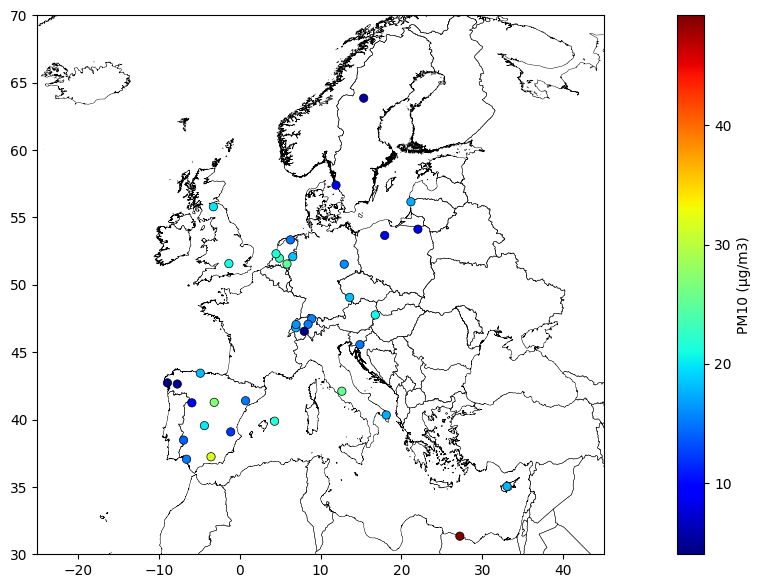

In [13]:
fig, ax = plt.subplots(1, figsize=(19, 7))
ax.set_xlim([-25, 45])
ax.set_ylim([30, 70])
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
nessy.shapefile.plot(ax=ax, column='pm10', cmap='jet', edgecolor='black', linewidth=0.5, legend=True,
                     legend_kwds={'label': 'PM10 (µg/m3)'})
ax.margins(0)

### 1.3. Write dataset

#### Write NetCDF

In [14]:
nessy.to_netcdf('points_non_ghost.nc', info=True)

/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/points_nes.py:368: UserWarning: WARNING!!! Different data types for variable station_start_date. Input dtype=<class 'str'>. Data dtype=object.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/points_nes.py:368: UserWarning: WARNING!!! Different data types for variable station_zone. Input dtype=<class 'str'>. Data dtype=object.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/points_nes.py:368: UserWarning: WARNING!!! Different data types for variable street_type. Input dtype=<class 'str'>. Data dtype=object.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/points_nes.py:368: UserWarning: WARNING!!! Different data types for variable country_code. Input dtype=<class 'str'>. Data dtype=object.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/points_nes.py:368: UserWarnin

Rank 000: Creating points_non_ghost.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done
Rank 000: Writing station_start_date var (1/17)
Rank 000: Var station_start_date created (1/17)
Rank 000: Filling station_start_date)
Rank 000: Var station_start_date data (1/17)
Rank 000: Var station_start_date completed (1/17)
Rank 000: Writing station_zone var (2/17)
Rank 000: Var station_zone created (2/17)
Rank 000: Filling station_zone)
Rank 000: Var station_zone data (2/17)
Rank 000: Var station_zone completed (2/17)
Rank 000: Writing street_type var (3/17)
Rank 000: Var street_type created (3/17)
Rank 000: Filling street_type)
Rank 000: Var street_type data (3/17)
Rank 000: Var street_type completed (3/17)
Rank 000: Writing country_code var (4/17)
Rank 000: Var country_code created (4/17)
Rank 000: Filling country_code)
Rank 000: Var country_code data (4/17)
Rank 000: Var country_code completed (4/17)
Rank 000: Writing ccaa var (5/17)
Rank 000: Var ccaa created (5/17)
Rank 000: Fill

#### Write shapefile

In [15]:
nessy.to_shapefile('points_non_ghost_shp')

/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3805: UserWarning: No vertical level has been specified. The first one will be selected.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3816: UserWarning: No time has been specified. The first one will be selected.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3756: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  self.shapefile.to_file(path)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'station_start_date' to 'station_st'
  ogr_write(
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'station_zone' to 'station_zo'
  ogr_write(
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/pyogrio

## 2. GHOST

In [16]:
# Points grid from EBAS network (GHOST)
path = '/gpfs/projects/bsc32/AC_cache/obs/ghost/EBAS/1.4/hourly/sconcno2/sconcno2_202003.nc'

### 2.1. Read dataset

In [17]:
nessy_ghost = nes.open_netcdf(path=path, info=True, parallel_method='X')
nessy_ghost

#### Read coordinates

In [18]:
nessy_ghost.time[0:10]

[datetime.datetime(2020, 3, 1, 0, 0),
 datetime.datetime(2020, 3, 1, 1, 0),
 datetime.datetime(2020, 3, 1, 2, 0),
 datetime.datetime(2020, 3, 1, 3, 0),
 datetime.datetime(2020, 3, 1, 4, 0),
 datetime.datetime(2020, 3, 1, 5, 0),
 datetime.datetime(2020, 3, 1, 6, 0),
 datetime.datetime(2020, 3, 1, 7, 0),
 datetime.datetime(2020, 3, 1, 8, 0),
 datetime.datetime(2020, 3, 1, 9, 0)]

In [19]:
nessy_ghost.lev

{'data': array([0]), 'units': ''}

In [20]:
nessy_ghost.station

{'data': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}

#### Read variables

In [21]:
nessy_ghost.keep_vars(['land_use', 'sconcno2', 'station_name', 'country'])
nessy_ghost.load()

Rank 000: Loading country var (1/4)
Rank 000: Loaded country var ((12,))
Rank 000: Loading land_use var (2/4)
Rank 000: Loaded land_use var ((12,))
Rank 000: Loading sconcno2 var (3/4)
Rank 000: Loaded sconcno2 var ((12, 744))
Rank 000: Loading station_name var (4/4)
Rank 000: Loaded station_name var ((12,))


Note that the variables in GHOST datasets have the dimensions in inverse order as in `(station, time)`

In [22]:
nessy_ghost.variables['sconcno2']

{'data': array([[0.29195723, 0.27478325, 0.27821803, ...,        nan,        nan,
                nan],
        [0.95658916, 0.90334994, 1.6418298 , ..., 4.6730328 , 4.1560965 ,
         4.001531  ],
        [1.4703113 , 0.97663015, 1.9103314 , ..., 2.2537618 ,        nan,
         2.0820467 ],
        ...,
        [2.52314   , 2.9062793 , 2.1786363 , ..., 0.34128392, 0.18030094,
         0.11054165],
        [9.422871  , 8.553562  , 7.813041  , ..., 6.514445  , 6.514445  ,
         6.9008036 ],
        [0.25971922, 0.21357076, 0.1888867 , ..., 0.33699107, 0.30801412,
                nan]], dtype=float32),
 'dimensions': ('station', 'time'),
 'dtype': dtype('float32'),
 'standard_name': 'nitrogen dioxide',
 'long_name': 'nitrogen dioxide',
 'units': 'nmol mol-1',
 'description': 'Measured value of surface nitrogen dioxide for the stated temporal resolution.'}

### 2.2. Plot

In [23]:
nessy_ghost.create_shapefile()

geometry
FID                           
0        POINT (7.985 46.5475)
1     POINT (8.17543 47.18961)
2    POINT (15.08028 49.57339)
3     POINT (8.30972 54.92556)
4    POINT (10.75944 52.80222)
5     POINT (7.90861 47.91472)
6    POINT (13.03333 53.16667)
7       POINT (10.76667 50.65)
8      POINT (12.7249 54.4368)
9       POINT (24.28333 61.85)
10        POINT (8.63333 45.8)
11       POINT (10.7 44.18333)

In [24]:
nessy_ghost.shapefile['sconcno2'] = nessy_ghost.variables['sconcno2']['data'][:, 0].ravel()
nessy_ghost.shapefile

geometry  sconcno2
FID                                     
0        POINT (7.985 46.5475)  0.291957
1     POINT (8.17543 47.18961)  0.956589
2    POINT (15.08028 49.57339)  1.470311
3     POINT (8.30972 54.92556)  1.122448
4    POINT (10.75944 52.80222)  1.700517
5     POINT (7.90861 47.91472)       NaN
6    POINT (13.03333 53.16667)  1.223471
7       POINT (10.76667 50.65)  1.021437
8      POINT (12.7249 54.4368)  1.650011
9       POINT (24.28333 61.85)  2.523140
10        POINT (8.63333 45.8)  9.422871
11       POINT (10.7 44.18333)  0.259719

In [ ]:
fig, ax = plt.subplots(1, figsize=(19, 7))
ax.set_xlim([-25, 45])
ax.set_ylim([30, 70])
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
nessy_ghost.shapefile.plot(ax=ax, column='sconcno2', cmap='jet', edgecolor='black', lw=0.5, legend=True,
                           legend_kwds={'label': 'Surface NO2 (nmol mol-1)'})
ax.margins(0)

### 2.3. Write dataset

#### Write NetCDF

In [ ]:
nessy_ghost.to_netcdf('points_ghost.nc', info=True)

#### Write shapefile

In [ ]:
nessy_ghost.to_netcdf('points_ghost.nc', info=True)